In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
import warnings
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")


In [182]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

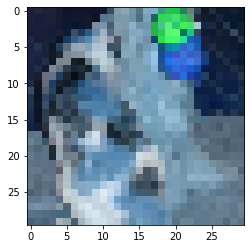

In [183]:
img = load_img(r'C:\Users\USER\Desktop\train/cat.1.jpg')
resize_img = cv2.resize(tmp,(30,30))
plt.imshow(resize_img)


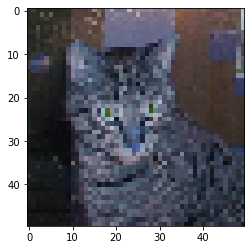

In [184]:
#lets try to get a better resolution
img = cv2.imread(r'C:\Users\USER\Desktop\train/cat.1.jpg')
resize_img = cv2.resize(img,(50,50))
plt.imshow(resize_img)


In [237]:
def create(animal):
    tmp = cv2.imread(r'C:\Users\USER\Desktop\t'+animal+'.0.jpg')
    resize = cv2.resize(tmp,(50,50))
    resize = pd.Series(resize.flatten())
    resize = np.array(resize)
    arr = resize
    for i in range(1,12500):
        tmp = cv2.imread(r'C:\Users\USER\Desktop\t'+animal+'.'+str(i)+'.jpg')
        resize = cv2.resize(tmp,(50,50))
        resize = pd.Series(resize.flatten())
        resize = np.array(resize)
        arr = np.vstack((resize, arr))
    return pd.DataFrame(arr)
def create2():
    tmp = cv2.imread(r'C:\Users\USER\Desktop\test1\1.jpg')
    resize = cv2.resize(tmp,(50,50))
    resize = pd.Series(resize.flatten())
    resize = np.array(resize)
    arr = resize
    for i in range(2,12501):
        tmp = cv2.imread(r'C:\Users\USER\Desktop\test1\\'+str(i)+'.jpg')
        resize = cv2.resize(tmp,(50,50))
        resize = pd.Series(resize.flatten())
        resize = np.array(resize)
        arr = np.vstack((resize, arr))
    return pd.DataFrame(arr)

In [242]:
df = create('rain/cat')
df['label'] = 0
df2 = create('rain/dog')
df2['label'] = 1
train = pd.concat([df,df2])
train

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,label
0,27,33,52,23,29,48,36,42,61,24,...,96,118,136,99,121,139,93,110,130,0
1,151,143,130,135,127,114,121,112,98,103,...,208,209,205,205,206,202,196,196,192,0
2,179,174,175,174,176,176,167,167,167,175,...,190,209,231,137,158,183,183,215,250,0
3,222,223,221,222,223,221,222,223,221,223,...,44,39,38,38,32,33,30,24,25,0
4,122,120,120,126,124,124,128,126,126,129,...,156,151,140,157,151,138,145,133,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,151,159,139,150,158,141,152,160,143,...,65,68,79,35,33,39,40,39,41,1
12496,215,223,213,194,205,199,190,198,194,198,...,175,173,162,171,169,158,174,172,161,1
12497,141,170,193,175,171,164,186,149,118,212,...,199,205,210,203,209,214,209,215,220,1
12498,58,94,135,57,95,139,35,58,81,49,...,227,244,247,213,236,238,214,236,234,1


In [238]:
test = create2()
test

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,96,84,82,108,103,100,39,39,46,200,...,164,164,159,156,162,157,154,163,158,155
1,114,93,75,117,96,78,117,96,78,119,...,95,78,77,57,90,89,69,75,69,46
2,168,203,229,174,209,235,178,219,247,180,...,79,24,21,16,22,19,29,164,156,179
3,156,160,149,161,165,154,165,166,162,171,...,111,42,51,50,69,81,88,118,127,116
4,83,29,214,48,30,71,69,21,201,79,...,165,66,24,162,102,44,227,94,57,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,223,229,224,210,216,211,194,205,203,180,...,65,50,59,64,81,83,93,73,82,91
12496,61,168,87,65,152,79,42,143,72,85,...,114,58,156,90,23,95,51,52,152,89
12497,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12498,30,29,65,32,31,67,26,25,61,30,...,68,38,36,65,32,30,59,39,37,66


In [247]:

X_train, X_test, y_train, y_test = train_test_split(train.drop("label",axis=1), train["label"], test_size=0.2,random_state=1)
X_train = X_train/255
X_test = X_test/255

In [248]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [253]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)

0.6034

In [251]:
from xgboost import XGBClassifier
model = XGBClassifier( use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with all the data: %.2f%%" % (accuracy * 100.0))

[01:39:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with all the data: 63.06%
